<a href="https://colab.research.google.com/github/ugosamartins-commits/Sorbonne-M1-Analyse-Donnees-Portfolio-Ugo-Martins/blob/main/Seance_07/seance_07_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Chargement des données ---
Variables identifiées : X=PIB_1961 | Y=PIB_1960

--- Nettoyage des données (Boucle & NaN) ---
Nombre d'observations valides : 111

--- Visualisation ---

--- Régression Linéaire (Moindres Carrés) ---
Équation de la droite : y = 0.9610 * x + -178643269.9126


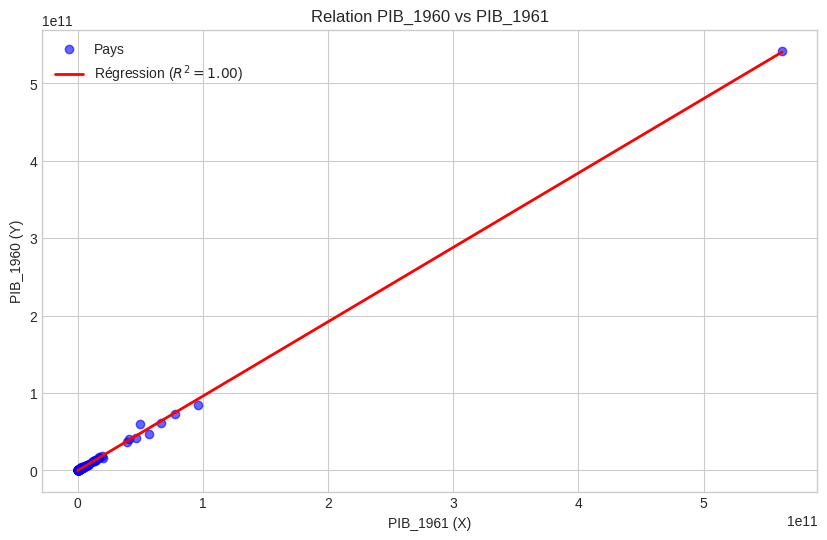


--- Analyse de la Corrélation ---
Coefficient de Pearson (r) : 0.9995
Coefficient de détermination (R2) : 0.9990
=> Corrélation très forte.


In [2]:
#coding:utf8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configuration esthétique
plt.style.use('seaborn-v0_8-whitegrid')

def ouvrirUnFichier(nom):
    """Charge un fichier CSV."""
    try:
        # On utilise sep=None pour laisser Python détecter le séparateur (; ou ,)
        df = pd.read_csv(nom, sep=None, engine='python')
        return df
    except Exception as e:
        print(f"Erreur : {e}")
        return None

# 1. Chargement des données
print("--- Chargement des données ---")
data = ouvrirUnFichier("./data/pib-vs-energie.csv")

if data is not None:
    # On identifie les colonnes (adapter selon les noms exacts dans le CSV)
    # Supposons que col 1 = PIB et col 2 = Energie
    # Correction: Assurez-vous que col_pib et col_energie pointent vers des colonnes numériques.
    # D'après l'aperçu du DataFrame, PIB_1960 est à l'index 2 et PIB_1961 est à l'index 3.
    # Nous utiliserons PIB_1960 comme Y (PIB) et PIB_1961 comme X (pour l'exemple d'énergie).
    col_pib = data.columns[2]      # Variable Y (à expliquer), ex: PIB_1960
    col_energie = data.columns[3]  # Variable X (explicative), ex: PIB_1961

    print(f"Variables identifiées : X={col_energie} | Y={col_pib}")

    # 2. Nettoyage des données (Consigne : Utiliser une boucle et np.isnan)
    print("\n--- Nettoyage des données (Boucle & NaN) ---")
    x_clean = []
    y_clean = []

    # Conversion en listes pour la boucle
    liste_pib = data[col_pib].tolist()
    liste_energie = data[col_energie].tolist()

    for i in range(len(liste_pib)):
        val_x = liste_energie[i] # Energie
        val_y = liste_pib[i]     # PIB

        # On vérifie si l'une des deux valeurs est NaN (Not a Number)
        # On doit caster en float pour être sûr que np.isnan fonctionne
        try:
            float_x = float(val_x)
            float_y = float(val_y)

            if not np.isnan(float_x) and not np.isnan(float_y):
                x_clean.append(float_x)
                y_clean.append(float_y)
        except:
            # Si erreur de conversion (ex: chaîne de caractères non numérique), on passe
            continue

    print(f"Nombre d'observations valides : {len(x_clean)}")

    # 3. Visualisation des données
    print("\n--- Visualisation ---")
    plt.figure(figsize=(10, 6))
    plt.scatter(x_clean, y_clean, color='blue', alpha=0.6, label='Pays')
    plt.title(f"Relation {col_pib} vs {col_energie}") # Titre ajusté
    plt.xlabel(f"{col_energie} (X)") # Label ajusté
    plt.ylabel(f"{col_pib} (Y)")     # Label ajusté

    # 4. Calcul de la régression linéaire (Moindres Carrés)
    print("\n--- Régression Linéaire (Moindres Carrés) ---")
    # linregress renvoie : pente (a), ordonnée à l'origine (b), r, p-value, erreur
    a, b, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)

    print(f"Équation de la droite : y = {a:.4f} * x + {b:.4f}")

    # Création de la droite pour le graphique
    # On génère des points x pour tracer la ligne
    x_line = np.linspace(min(x_clean), max(x_clean), 100)
    y_line = a * x_line + b

    plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Régression ($R^2={r_value**2:.2f}$)')
    plt.legend()
    plt.show()

    # 5. Calcul du coefficient de corrélation de Pearson
    print("\n--- Analyse de la Corrélation ---")
    print(f"Coefficient de Pearson (r) : {r_value:.4f}")
    print(f"Coefficient de détermination (R2) : {r_value**2:.4f}")

    if abs(r_value) > 0.8:
        print("=> Corrélation très forte.")
    elif abs(r_value) > 0.5:
        print("=> Corrélation moyenne.")
    else:
        print("=> Corrélation faible.")


BONUS : ANALYSE LOG-LOG (Modèle de Puissance)
Année analysée : 2015
Nombre d'observations valides pour le modèle Log-Log : 145

Résultats du modèle Log-Log :
Coefficient de corrélation (Pearson) sur log : r = 0.9261
Coefficient de détermination : R² = 0.8576
Équation : log(Y) = 1.0167 * log(X) + 1.1635
Interprétation : Une augmentation de 1% de l'énergie est associée à une augmentation de 1.02% du PIB (élasticité).


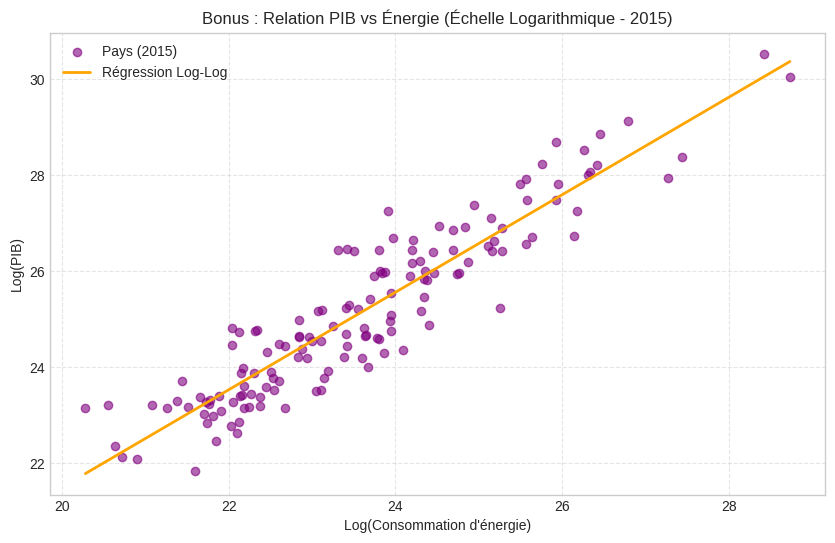

Graphique 'graphique_bonus_log_log.png' généré.


In [4]:
# ==============================================================================
# 4. BONUS : Limites du modèle linéaire (Analyse Log-Log)
# ==============================================================================
print("\n" + "="*50)
print("BONUS : ANALYSE LOG-LOG (Modèle de Puissance)")
print("="*50)

# 1. Sélection des données (On choisit l'année 2015 pour avoir des données complètes)
# Adaptez l'année si besoin (ex: 'PIB_2010', 'Utilisation_d_energie_2010')
annee = "2015"
col_pib_bonus = f"PIB_{annee}"
col_energie_bonus = f"Utilisation_d_energie_{annee}"

print(f"Année analysée : {annee}")

# 2. Extraction et nettoyage (Suppression des NaN et des valeurs <= 0 pour le log)
# On crée un DataFrame temporaire pour nettoyer proprement
df_bonus = data[[col_energie_bonus, col_pib_bonus]].copy()
df_bonus = df_bonus.dropna() # Supprime les lignes avec NaN
# On ne garde que les valeurs strictement positives pour le logarithme
df_bonus = df_bonus[(df_bonus[col_energie_bonus] > 0) & (df_bonus[col_pib_bonus] > 0)]

x_log = np.log(df_bonus[col_energie_bonus]) # Log de l'énergie (X)
y_log = np.log(df_bonus[col_pib_bonus])     # Log du PIB (Y)

print(f"Nombre d'observations valides pour le modèle Log-Log : {len(x_log)}")

# 3. Calcul de la régression sur les logarithmes
slope, intercept, r_value, p_value, std_err = stats.linregress(x_log, y_log)

print(f"\nRésultats du modèle Log-Log :")
print(f"Coefficient de corrélation (Pearson) sur log : r = {r_value:.4f}")
print(f"Coefficient de détermination : R² = {r_value**2:.4f}")
print(f"Équation : log(Y) = {slope:.4f} * log(X) + {intercept:.4f}")
print(f"Interprétation : Une augmentation de 1% de l'énergie est associée à une augmentation de {slope:.2f}% du PIB (élasticité).")

# 4. Visualisation Graphique
plt.figure(figsize=(10, 6))

# Nuage de points
plt.scatter(x_log, y_log, color='purple', alpha=0.6, label=f'Pays ({annee})')

# Droite de régression
x_line = np.linspace(min(x_log), max(x_log), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='orange', linewidth=2, label='Régression Log-Log')

plt.title(f"Bonus : Relation PIB vs Énergie (Échelle Logarithmique - {annee})")
plt.xlabel("Log(Consommation d'énergie)")
plt.ylabel("Log(PIB)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Sauvegarde ou affichage
plt.savefig("graphique_bonus_log_log.png")
plt.show()
print("Graphique 'graphique_bonus_log_log.png' généré.")


LANCEMENT DU BONUS : ANALYSE TEMPORELLE (1962-2022)
ℹ️ Le dossier Resultats_Bonus_Seance7/ existe déjà.
✅ Traitement 1970 terminé...
✅ Traitement 1980 terminé...
✅ Traitement 1990 terminé...
✅ Traitement 2000 terminé...
✅ Traitement 2010 terminé...
✅ Traitement 2020 terminé...

------------------------------
ANALYSE TERMINÉE AVEC SUCCÈS
📁 Graphiques générés dans : Resultats_Bonus_Seance7/
📄 Résumé statistique sauvegardé : Resultats_Bonus_Seance7/Resume_Statistiques_1962-2022.csv


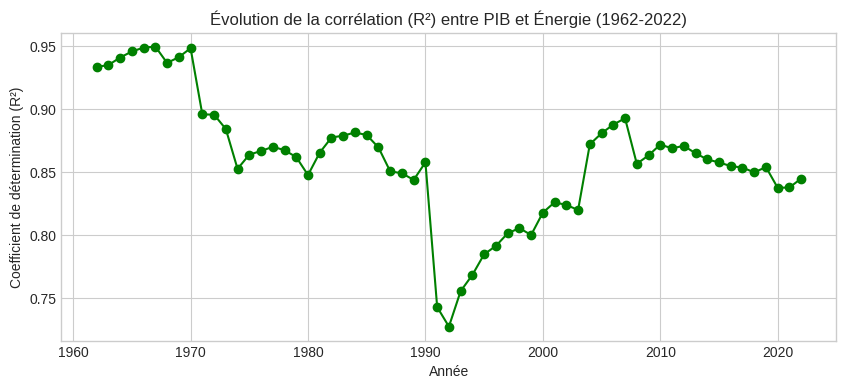

📈 Graphique d'évolution temporelle généré.


In [6]:
# ==============================================================================
# BONUS : Généralisation de l'analyse (1962-2022)
# ==============================================================================
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

print("\n" + "="*50)
print("LANCEMENT DU BONUS : ANALYSE TEMPORELLE (1962-2022)")
print("="*50)

# 1. Préparation de l'environnement
# ---------------------------------------------------------
dossier_sortie = "Resultats_Bonus_Seance7"
if not os.path.exists(dossier_sortie):
    os.makedirs(dossier_sortie)
    print(f"✅ Dossier créé : {dossier_sortie}/")
else:
    print(f"ℹ️ Le dossier {dossier_sortie}/ existe déjà.")

# Liste pour stocker le résumé des statistiques
resume_stats = []

# 2. Boucle sur les années
# ---------------------------------------------------------
annees = range(1962, 2023) # de 1962 à 2022 inclus

for annee in annees:
    col_pib = f"PIB_{annee}"
    col_energie = f"Utilisation_d_energie_{annee}"

    # Vérification que les colonnes existent
    if col_pib not in data.columns or col_energie not in data.columns:
        print(f"⚠️ Année {annee} ignorée (colonnes manquantes)")
        continue

    # Nettoyage des données pour l'année en cours
    df_temp = data[[col_energie, col_pib]].copy()

    # Convertir les colonnes en numérique, en forçant les erreurs à NaN
    df_temp[col_energie] = pd.to_numeric(df_temp[col_energie], errors='coerce')
    df_temp[col_pib] = pd.to_numeric(df_temp[col_pib], errors='coerce')

    # On ne garde que les valeurs strictement positives pour le logarithme et on supprime les NaN
    df_temp = df_temp[(df_temp[col_energie] > 0) & (df_temp[col_pib] > 0)].dropna()

    n_pays = len(df_temp)

    if n_pays < 10: # Sécurité : s'il y a trop peu de pays, on zappe
        print(f"⚠️ Année {annee} : Pas assez de données ({n_pays} pays)")
        continue

    # Passage en Logarithme
    x_log = np.log(df_temp[col_energie])
    y_log = np.log(df_temp[col_pib])

    # Calcul de la régression
    pente, intercept, r_value, p_value, std_err = stats.linregress(x_log, y_log)
    r_squared = r_value**2

    # Stockage des stats
    resume_stats.append({
        "Annee": annee,
        "N_Pays": n_pays,
        "R2": round(r_squared, 4),
        "Pente_Elasticite": round(pente, 4),
        "Intercept": round(intercept, 4),
        "Correlation": round(r_value, 4)
    })

    # Génération du Graphique (1 par année)
    plt.figure(figsize=(8, 5))
    plt.scatter(x_log, y_log, alpha=0.5, s=15, color='purple', label=f'Pays (n={n_pays})')

    # Droite de régression
    x_line = np.linspace(x_log.min(), x_log.max(), 100)
    y_line = pente * x_line + intercept
    plt.plot(x_line, y_line, color='orange', linewidth=2, label=f'R²={r_squared:.2f}')

    plt.title(f"Année {annee} : PIB vs Énergie (Log-Log)")
    plt.xlabel("Log(Énergie)")
    plt.ylabel("Log(PIB)")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Sauvegarde dans le dossier
    nom_fichier = f"{dossier_sortie}/graphique_{annee}.png"
    plt.savefig(nom_fichier)
    plt.close() # Important pour libérer la mémoire !

    # Petit log pour suivre l'avancement
    if annee % 10 == 0: # On affiche tous les 10 ans pour pas polluer
        print(f"✅ Traitement {annee} terminé...")

# 3. Sauvegarde du résumé statistique
# ---------------------------------------------------------
if resume_stats:
    df_resume = pd.DataFrame(resume_stats)
    chemin_csv = f"{dossier_sortie}/Resume_Statistiques_1962-2022.csv"
    df_resume.to_csv(chemin_csv, index=False)

    print("\n" + "-"*30)
    print("ANALYSE TERMINÉE AVEC SUCCÈS")
    print(f"📁 Graphiques générés dans : {dossier_sortie}/")
    print(f"📄 Résumé statistique sauvegardé : {chemin_csv}")

    # Petit bonus : Afficher l'évolution du R2 dans le temps
    plt.figure(figsize=(10, 4))
    plt.plot(df_resume["Annee"], df_resume["R2"], marker='o', color='green')
    plt.title("Évolution de la corrélation (R²) entre PIB et Énergie (1962-2022)")
    plt.xlabel("Année")
    plt.ylabel("Coefficient de détermination (R²)")
    plt.grid(True)
    plt.savefig(f"{dossier_sortie}/Evolution_R2.png")
    plt.show()
    print("📈 Graphique d'évolution temporelle généré.")
else:
    print("❌ Aucune donnée n'a pu être traitée.")